<a href="https://colab.research.google.com/github/ahelmasri87/-AAI614_elmasri/blob/main/project_1_ahmad_elmasri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
df = pd.concat([X, y], axis=1)
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
# Question 1: Check the Columns of Your Data and Their Data Types

# Check the data types of each column
print(df.dtypes)

# Expected data types for each column
expected_types = {
    'age': 'int64',
    'workclass': 'object',
    'fnlwgt': 'int64',
    'education': 'object',
    'education-num': 'int64',  # Updated the column name here
    'marital-status': 'object',  # Updated the column name here
    'occupation': 'object',
    'relationship': 'object',
    'race': 'object',
    'sex': 'object',
    'capital-gain': 'int64',  # Updated the column name here
    'capital-loss': 'int64',  # Updated the column name here
    'hours-per-week': 'int64',  # Updated the column name here
    'native-country': 'object',  # Updated the column name here
    'income': 'object'
}

for column, expected_type in expected_types.items():
    actual_type = df[column].dtypes
    if actual_type == expected_type:
        print(f"{column}: Data type is as expected ({actual_type})")
    else:
        print(f"{column}: Unexpected data type ({actual_type}), expected ({expected_type})")


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
age: Data type is as expected (int64)
workclass: Data type is as expected (object)
fnlwgt: Data type is as expected (int64)
education: Data type is as expected (object)
education-num: Data type is as expected (int64)
marital-status: Data type is as expected (object)
occupation: Data type is as expected (object)
relationship: Data type is as expected (object)
race: Data type is as expected (object)
sex: Data type is as expected (object)
capital-gain: Data type is as expected (int64)
capital-loss: Data type is as expected (int64)
hours-per-week: Data type is as expected (int64)
native-country: Data type is

In [ ]:
import numpy as np

# Question 2: Handle Missing Values
df.replace('?', np.nan, inplace=True)

# Step 2: Count missing values in each column
missing_values = df.isnull().sum()

# Print missing values per column
print("\nMissing Values per Column:\n", missing_values)



Missing Values per Column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


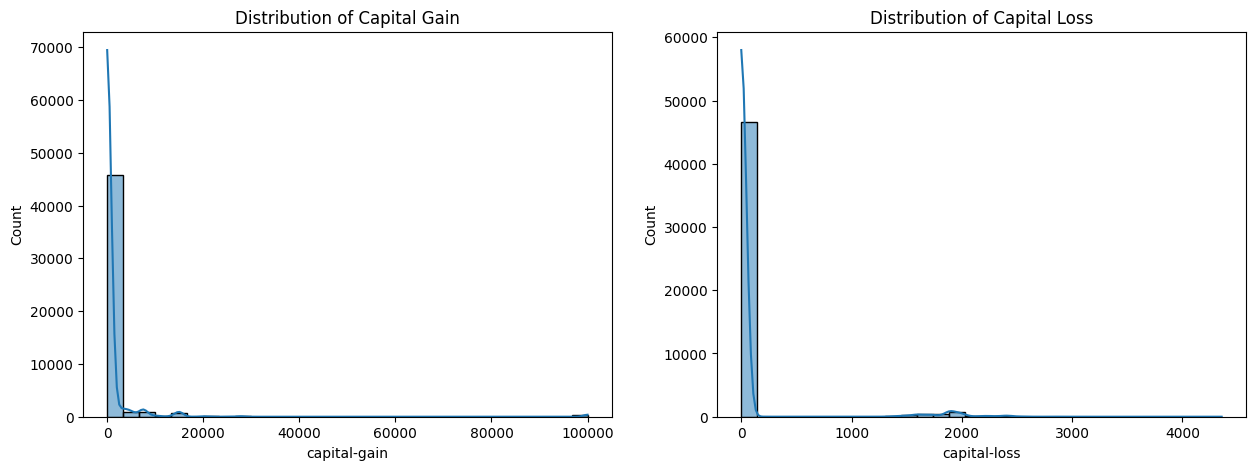


Capital Gain Category Distribution:
 capital_gain_category
No Gain    44807
Gain        4035
Name: count, dtype: int64

Capital Loss Category Distribution:
 capital_loss_category
No Loss    46560
Loss        2282
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 3: Plot Distributions of 'capital-gain' and 'capital-loss'

# Plot distributions of 'capital-gain' and 'capital-loss'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['capital-gain'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Capital Gain')

sns.histplot(df['capital-loss'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Capital Loss')

plt.show()

# Question: Should 'capital-gain' and 'capital-loss' be Transformed into Categorical Variables?
# Based on the distributions, if most values are zero and only a few are positive, these could be transformed.

# Example Transformation: Categorize 'capital-gain' and 'capital-loss'
df['capital_gain_category'] = pd.cut(df['capital-gain'], bins=[-1, 0, df['capital-gain'].max()], labels=['No Gain', 'Gain'])
df['capital_loss_category'] = pd.cut(df['capital-loss'], bins=[-1, 0, df['capital-loss'].max()], labels=['No Loss', 'Loss'])

# Display the distribution of the new categorical variables
print("\nCapital Gain Category Distribution:\n", df['capital_gain_category'].value_counts())
print("\nCapital Loss Category Distribution:\n", df['capital_loss_category'].value_counts())


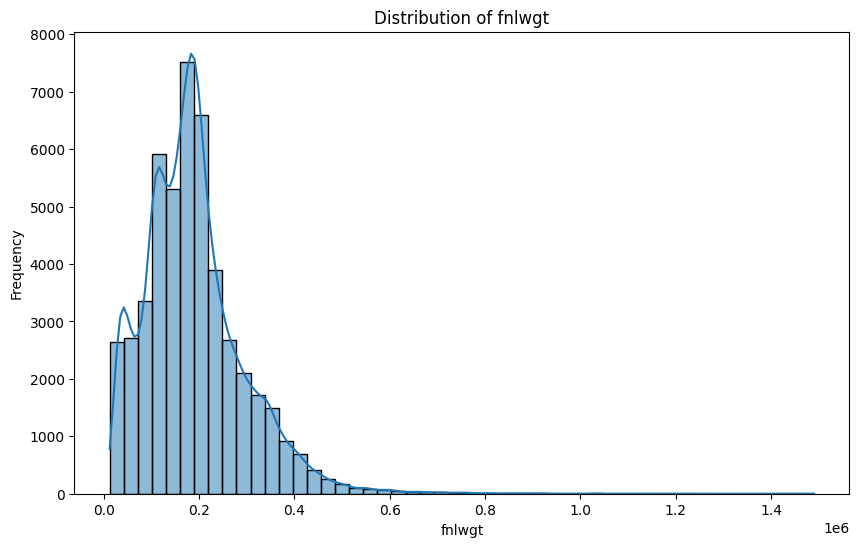


Summary Statistics for 'fnlwgt':
 count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


In [ ]:
# Question 4: Plot the Distribution of 'fnlwgt'

# Plot the distribution of 'fnlwgt'
plt.figure(figsize=(10, 6))
sns.histplot(df['fnlwgt'], bins=50, kde=True)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of 'fnlwgt' to understand the distribution better
fnlwgt_stats = df['fnlwgt'].describe()
print("\nSummary Statistics for 'fnlwgt':\n", fnlwgt_stats)


#the variable fnlwgt represents the final weight assigned to each observation in the dataset. This weight indicates
#the share of the population that the sample represents, based on factors such as geographic location and other demographic features.
#The below plot shows the distribution of these sampling weights, and the summary statistics provide insight into the central
#tendency and variability.

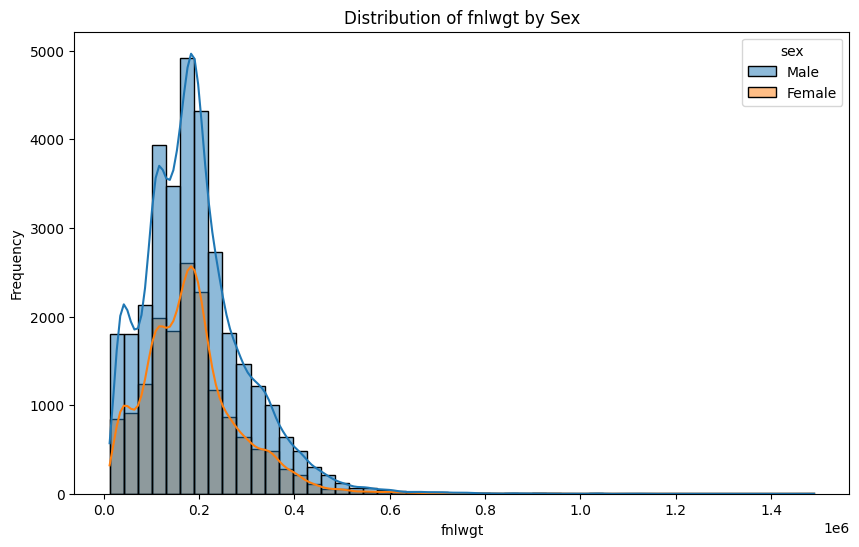

In [ ]:
# Question 5: Compare 'fnlwgt' Distribution Between Men and Women

# Compare 'fnlwgt' distribution between men and women
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fnlwgt', hue='sex', bins=50, kde=True)
plt.title('Distribution of fnlwgt by Sex')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Question: Should Outliers Be Excluded from 'fnlwgt'?
# Based on the distribution, decide if outliers should be excluded. If yes, set them as missing values.

#Remove Outliers in 'fnlwgt' (values above the 99th percentile)
fnlwgt_threshold = df['fnlwgt'].quantile(0.99)
df.loc[df['fnlwgt'] > fnlwgt_threshold, 'fnlwgt'] = np.nan

In [ ]:
# Question 1: Calculate Correlations Between Age, Education_num, and Hours_per_week

# Calculate correlations between age, education-num, and hours-per-week
correlation_matrix = df[['age', 'education-num', 'hours-per-week']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                      age  education-num  hours-per-week
age             1.000000       0.030940        0.071558
education-num   0.030940       1.000000        0.143689
hours-per-week  0.071558       0.143689        1.000000


In [ ]:
from scipy.stats import pearsonr

# Question 2: Statistically Test Correlation Coefficients > |0.1|

columns = ['age', 'education-num', 'hours-per-week']

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            # Calculate the Pearson correlation coefficient between the two columns
            corr, _ = pearsonr(df[col1].dropna(), df[col2].dropna())
            if abs(corr) > 0.1:
                print(f"Correlation between {col1} and {col2}: {corr:.2f}")


Correlation between education-num and hours-per-week: 0.14
Correlation between hours-per-week and education-num: 0.14


In [ ]:
# Question 3: Compare Correlation Between Education-num and Age by Sex

# Calculate correlation between 'education-num' and 'age' for male and female participants
correlation_male = df[df['sex'] == 'Male'][['education-num', 'age']].corr().iloc[0, 1]
correlation_female = df[df['sex'] == 'Female'][['education-num', 'age']].corr().iloc[0, 1]

# Print the correlations
print(f"\nCorrelation between education-num and age for males: {correlation_male:.2f}")
print(f"Correlation between education-num and age for females: {correlation_female:.2f}")



Correlation between education-num and age for males: 0.05
Correlation between education-num and age for females: -0.02


In [ ]:
# Question 4: Compute Covariance Matrix for Education-num and Hours-per-week

# Compute covariance matrix for 'education-num' and 'hours-per-week'
cov_matrix = df[['education-num', 'hours-per-week']].cov()

# Print the covariance matrix
print("\nCovariance Matrix:\n", cov_matrix)



Covariance Matrix:
                 education-num  hours-per-week
education-num        6.609901        4.577651
hours-per-week       4.577651      153.547885
